<a href="https://colab.research.google.com/github/Anatoly333/Dogs_Babesiosis_Diagnostics/blob/main/Draw_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Библиотека для работы с матрицами
import numpy as np 

# Алгоритмы линейной алгебры
import scipy.linalg as sla

import math

import pandas as pd

In [ ]:
data = pd.read_excel('data_all_no_emissions.xlsx')

In [ ]:
data = data.drop(columns=['Болен или нет'])
data = data.drop(columns=['Гемоглобин (Hgb)'])

Начинаем

In [ ]:
import random
from scipy.linalg import qr

x = []
y = []
help_array = []
i = 0
for i in range (7):
  a_x = random.randint(-5,5)
  a_y = random.randint(-5,5)
  help_array.append(a_x)
  help_array.append(a_y)
  x.append(a_x)
  y.append(a_y)
vector_x = np.array(x)
vector_y = np.array(y)
print(vector_x)
print(vector_y)

u1 = vector_x 
proj = np.dot(u1, vector_y) / np.dot(u1, u1) * u1 
u2 = vector_y - proj
print(u2)
norm = np.linalg.norm(u1)
print(norm)
e1 = u1 /  np.linalg.norm(u1)
e2 = u2 / np.linalg.norm(u2)
print(e1)
print(e2)

[-2  0  5  0 -3 -4  1]
[-2  4  5 -2  0  3  2]
[-1.30909091  4.          3.27272727 -2.          1.03636364  4.38181818
  1.65454545]
7.416198487095663
[-0.26967994  0.          0.67419986  0.         -0.40451992 -0.53935989
  0.13483997]
[-0.17582169  0.53723293  0.43955421 -0.26861646  0.13919217  0.58851425
  0.22221907]


In [ ]:
data_std = data.copy()

i = 0
j = 0
names = data.columns

for i in range(7):
  std = float(np.std(data_std.iloc[:, [i]]))
  for j in range(len(data_std.iloc[:, [0]])):
    data_std[names[i]].iloc[j] = data_std.iloc[j][i] / std
print(data_std)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


     Эритроциты (RBC)  ...  Средний объем эритроцита (MCV)
0            2.382512  ...                       14.024632
1            3.721444  ...                       13.013510
2            3.964289  ...                       11.478103
3            2.901020  ...                       12.657745
4            4.213698  ...                       13.650142
..                ...  ...                             ...
195          5.211334  ...                       12.526674
196          3.970853  ...                       13.331826
197          4.272769  ...                       13.425449
198          1.864003  ...                       12.732643
199          4.194008  ...                       12.713918

[200 rows x 7 columns]


In [ ]:
health_dogs = data_std[:136]
sick_dogs = data_std[136:]

In [ ]:
vectors_array = []
i = 0
help_array = []
for i in range(200):
  help_array.append(np.dot(data_std.iloc[i], e1))
  help_array.append(np.dot(data_std.iloc[i], e2))
  vectors_array.append(list(help_array))
  help_array.clear()
print(vectors_array)

[[1.329612890376206, 3.2627649382232637], [-0.4038576791935601, 1.9371865314256702], [0.3073563270947416, 1.5399736677014446], [0.24589301804263072, 1.7267315740172613], [-0.10429066723710174, 1.8850951807718768], [0.23205981400235925, 1.4618115980985829], [-0.04992507900598277, 2.0068426438626705], [0.6284880482513859, 2.3716528314491017], [0.307475908654267, 1.4508191099688392], [0.9825868335993386, 1.2325448658578735], [0.0988557185150329, 1.93373417356838], [-0.37025111313881015, 2.1668972799739636], [0.22327891673363634, 1.7532154295413924], [1.5701792826686494, 2.527938970423557], [-0.12141033408270495, 2.2541411969061187], [0.690482084708512, 1.7816549726923894], [1.5361101629370497, 3.7273645521793126], [0.7962080076871877, 1.569859464567928], [-0.27453609780534116, 1.745668407314819], [0.8310460968432297, 2.5547323540339653], [-0.58372505549059, 2.0141988242413538], [0.03381544771054137, 1.8348443501590759], [0.3678806404320531, 1.8383635247412113], [0.03747092991781267, 1.692

In [ ]:
x_array_health = []
y_array_health = []
x_array_sick = []
y_array_sick = []
i = 0

for i in range(136):
  x_array_health.append(np.dot(health_dogs.iloc[i], e1))
  y_array_health.append(np.dot(health_dogs.iloc[i], e2))
for i in range(64):
  x_array_sick.append(np.dot(sick_dogs.iloc[i], e1))
  y_array_sick.append(np.dot(sick_dogs.iloc[i], e2))
  
print(x_array_health)
print(y_array_health)
print(x_array_sick)
print(y_array_sick)

[1.329612890376206, -0.4038576791935601, 0.3073563270947416, 0.24589301804263072, -0.10429066723710174, 0.23205981400235925, -0.04992507900598277, 0.6284880482513859, 0.307475908654267, 0.9825868335993386, 0.0988557185150329, -0.37025111313881015, 0.22327891673363634, 1.5701792826686494, -0.12141033408270495, 0.690482084708512, 1.5361101629370497, 0.7962080076871877, -0.27453609780534116, 0.8310460968432297, -0.58372505549059, 0.03381544771054137, 0.3678806404320531, 0.03747092991781267, 0.14074934095186825, 0.3875121137282171, 0.39496788838919017, 0.03158212385075955, 0.3306710934699402, -0.9478143956111302, 0.5204894933847052, 1.2062660890144299, 0.08712913531297738, 0.24695503555659326, 1.4615952598554043, 1.0188785761861139, -0.29766322077471385, 0.8276993339234084, 1.979841951891701, 0.1436339786490379, 0.6814278079523363, 0.2979510276154546, 0.26519275201782877, -0.26401995837162223, 0.13998517472151853, 0.9351284002962756, 0.876038654672726, 0.7736521813240773, -0.17583424269288

Text(0.5, 0, 'x_vector')

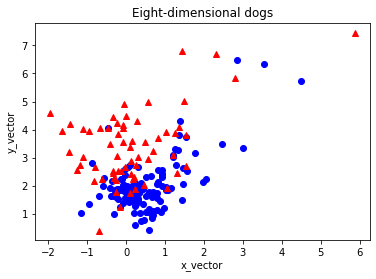

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x_array_health, y_array_health, 'bo', x_array_sick, y_array_sick, 'r^')
plt.title('Eight-dimensional dogs')
plt.ylabel('y_vector')
plt.xlabel('x_vector')